<a href="https://colab.research.google.com/github/vaibhavgp69/nlp-basics/blob/main/sentiment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets
!pip install pandas

import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split


nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")
nltk.download('punkt')
nltk.download('maxent_treebank_pos_tagger')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [2]:
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv #not working here

--2023-05-27 13:58:09--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  --.-KB/s    in 0.08s   

2023-05-27 13:58:09 (40.0 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [3]:
import pandas as pd
df=pd.read_csv("AirlineTweets.csv")
df=df[['airline_sentiment' , 'text']]
df

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
...,...,...
14635,positive,@AmericanAir thank you we got on a different f...
14636,negative,@AmericanAir leaving over 20 minutes Late Flig...
14637,neutral,@AmericanAir Please bring American Airlines to...
14638,negative,"@AmericanAir you have my money, you change my ..."


<ipython-input-34-36f5145d13d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'][i]=' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",line).split())


       sentiment                                               text
0              1                                          What said
1              2  plus you ve added commercials to the experienc...
2              1  I didn t today Must mean I need to take anothe...
3              0  it s really aggressive to blast obnoxious ente...
4              0           and it s a really big bad thing about it
...          ...                                                ...
14635          2  thank you we got on a different flight to Chicago
14636          0  leaving over 20 minutes Late Flight No warning...
14637          1     Please bring American Airlines to BlackBerry10
14638          0  you have my money you change my flight and don...
14639          1  we have 8 ppl so we need 2 know how many seats...

[14640 rows x 2 columns]


<Axes: >

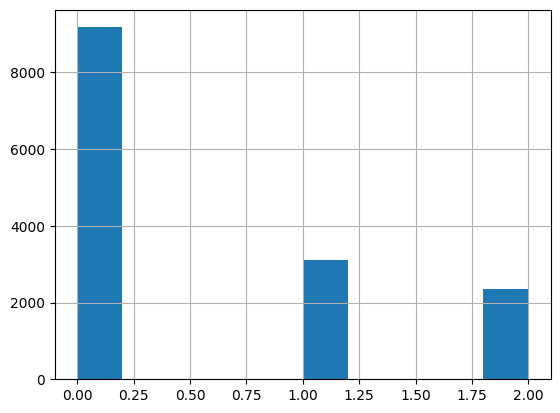

In [34]:

i=0
for line in df['text']:
  df['text'][i]=' '.join(re.sub("(@[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",line).split())
  i+=1
# while('' in  text1 ):
#   text1.remove('')
# text1
# df['text'][0]
df.rename(columns={"airline_sentiment":"sentiment"},inplace=True)
print(df)
df['sentiment'].hist()


In [12]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])
df2=df
text= df2['text'][:]

0                                                What said
1        plus you ve added commercials to the experienc...
2        I didn t today Must mean I need to take anothe...
3        it s really aggressive to blast obnoxious ente...
4                 and it s a really big bad thing about it
                               ...                        
14635    thank you we got on a different flight to Chicago
14636    leaving over 20 minutes Late Flight No warning...
14637       Please bring American Airlines to BlackBerry10
14638    you have my money you change my flight and don...
14639    we have 8 ppl so we need 2 know how many seats...
Name: text, Length: 14640, dtype: object

In [ ]:
def treebankTag(text):
    words = nltk.word_tokenize(text)
    treebankTagger = nltk.data.load('taggers/maxent_treebank_pos_tagger/english.pickle')
    return treebankTagger.tag(words)

def get_wordnet_pos(treebank_tag):

  if treebank_tag.startswith('J'):
      return wordnet.ADJ
  elif treebank_tag.startswith('V'):
      return wordnet.VERB
  elif treebank_tag.startswith('N'):
      return wordnet.NOUN
  elif treebank_tag.startswith('R'):
      return wordnet.ADV
  elif treebank_tag.startswith('S'):
      return wordnet.ADJ_SAT
  else:
      return  wordnet.NOUN   

wnl = WordNetLemmatizer()
lemmas= [' '.join(word) for word in  [[wnl.lemmatize(word=word,pos=get_wordnet_pos((treebankTag(word))[0][1])) for word in l.split()] for l in text]]
lemmas

In [37]:
print(lemmas[:2])
#model stuff
import pandas as pd
from sklearn.model_selection import train_test_split
X_label=text
y_label=df2.drop('text',axis=1)



X_train,X_test,y_train,y_test=train_test_split(X_label,y_label,test_size=0.2,random_state=0)   #change trains to train for one hot

#vectorizing
vect=TfidfVectorizer(stop_words='english',max_features=2050)
x_train=vect.fit_transform(X_train)
x_test=vect.transform(X_test)
x_train.toarray()


['What say', 'plus you ve add commercial to the experience tacky']


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [22]:
print(len(vect.get_feature_names_out()))
df3=pd.DataFrame(data=(x_train.toarray()),index = X_train ,columns = (vect.get_feature_names_out()))
# len(x_train.toarray())\
df3

2050


,00,000,03,05,10,100,1000,10pm,11,12,...,yo,york,young,yr,yrs,yup,yvr,yyz,zero,zone
text,,,,,,,,,,,,,,,,,,,,,
yes thankfully Catering just got here and now they are loading but very frustrated I was supposed to be there by 10 10 30,0.0,0.0,0.0,0.0,0.536348,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
yes I have amp they re unsure when it would come This has never happened on any airline and my first time with disappointed,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wife and I have two new destinations and I m stuck in DC until Monday with no bags,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Why do I still not have my bags They arrived amp website says they re still at the airport 2 1 2 hours Late Flightr nothappy,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
That s DFW OMG Yeah cold everywhere,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
followback,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
thanks for the help Wish the phone reps could be so accomidating,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
the Worst Ever dca customerservice,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


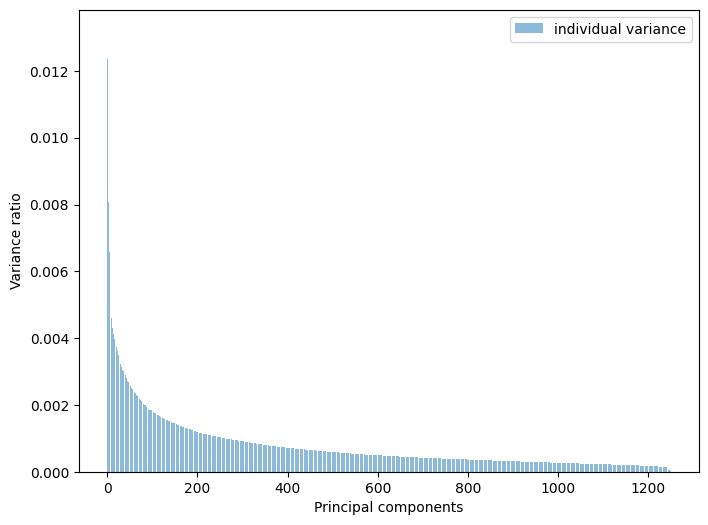

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA()
pca.fit_transform(x_train.toarray())
pca_variance = pca.explained_variance_

plt.figure(figsize=(8, 6))
plt.bar(range(1250), pca_variance, alpha=0.5, align='center', label='individual variance')
plt.legend()
plt.ylabel('Variance ratio')
plt.xlabel('Principal components')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
model= LogisticRegression(max_iter=500)
model.fit(x_train,y_train)                    # this one has low accuracy too
model.score(x_test,y_test)
# model2=GaussianNB()
# model2.fit(x_train.toarray(),y_train)        low accuracy
# model2.score(x_test.toarray(),y_test)

# model3=SVC(kernel='rbf')
# model3.fit(x_train,y_train)                   potential
# model3.score(x_test,y_test)


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7735655737704918

In [11]:
text={'exciting fun suprising and super'}
X_pred=vect.transform(text)
pred=model.predict(X_pred)[0]
print(pred)
if pred == 0: print('Predicted : NEGATIVE')
elif pred == 1 : print('Predicted : NEUTRAL')
elif pred == 2: print('Predicted : POSITIVE')

[1.47667111]


In [32]:
p_train=model.predict(x_train)
p_test=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm_train=confusion_matrix(y_train,p_train,normalize='true')
cm_test=confusion_matrix(y_test,p_test,normalize='true')
cm_train
# cm_test
# y_train
# p_train

array([[0.95402299, 0.03325123, 0.01272578],
       [0.35291751, 0.59758551, 0.04949698],
       [0.19906201, 0.09692548, 0.70401251]])

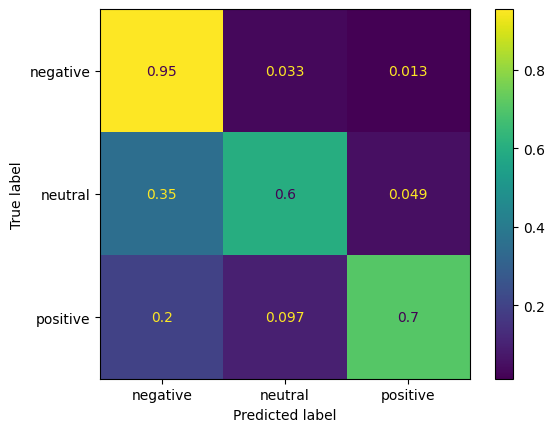

In [26]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

#FOR TRAIN DATA CM

disp_train=ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=['negative','neutral','positive'])
disp_train.plot()
#--> improve perfomrance by balancing classes , remove neutral , try SVC with rbf kernel d3

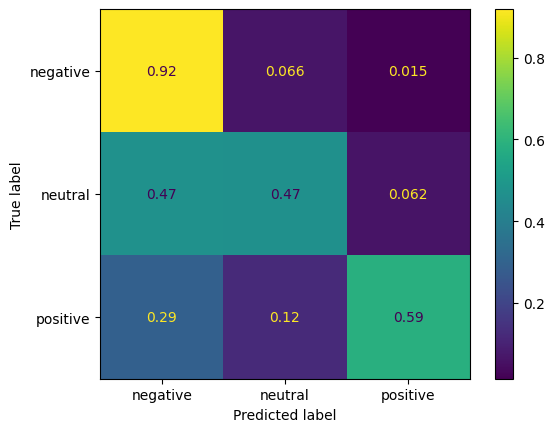

In [27]:

#FOR Test DATA CM

disp_train=ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=['negative','neutral','positive'])
disp_train.plot()
